# CLUSTERS -

In [1]:
# CARGUE DE LIBRERIAS
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gisselgutierrez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gisselgutierrez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Task 1 Read data
# Reading the file
data_xlsx = pd.read_excel(r"TweetSentAnalysis.xlsx")

In [3]:
df = data_xlsx

In [5]:
df.fillna(0)

,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp
0,0,OFFCORSS,Aug 6 2020 09:00 PM,OFFCORSS Newborn está contigo desde que tu beb...,positive,https://t.co/BpK70TnHbK,https://twitter.com/OFFCORSS/status/1291479162...,OFFCORSS Newborn is with you since your baby c...,0.9325,0.00,0.268,0.732,8,2,1,1,1
1,1,jonathan muñoz,Aug 6 2020 08:00 PM,RT @DianaTaborda5: @stevenarce @MdeFrancisco12...,neutral,0,https://twitter.com/jonathanmun92/status/12914...,RT @DianaTaborda5: @stevenarce @MdeFrancisco12...,0.5975,0.00,0.135,0.865,8,2,2,3,1
2,2,Diana Taborda,Aug 6 2020 03:04 PM,@stevenarce @MdeFrancisco12 ¿OFFCORSS es marca...,neutral,0,https://twitter.com/DianaTaborda5/status/12913...,@stevenarce @MdeFrancisco12 Is OFFCORSS a bran...,0.2700,0.06,0.083,0.857,8,2,2,3,1
3,3,Yeco - Edward,Aug 6 2020 06:35 AM,@OFFCORSS @Grupo_Exito juntos somos mas fuertes.,neutral,0,https://twitter.com/EdwardYeco/status/12912617...,@OFFCORSS @Grupo_Exito together we are stronger.,0.3818,0.00,0.342,0.658,8,1,2,3,1
4,4,Will,Aug 6 2020 02:00 AM,RT @OFFCORSS: Queremos seguir generando empleo...,neutral,0,https://twitter.com/Wikamapa/status/1291192316...,RT @OFFCORSS: We want to continue generating e...,0.5719,0.00,0.231,0.769,8,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,280,OFFCORSS,Jul 9 2020 04:30 PM,@Ivon72309428 @jessikapepe ¡Hola te ayudamos c...,neutral,0,https://twitter.com/OFFCORSS/status/1281264499...,"@Ivon72309428 @jessikapepe Hello, we help you ...",0.9432,0.00,0.436,0.564,7,2,1,3,1
281,281,OFFCORSS,Jul 9 2020 04:30 PM,@ramirolopera ¡Un espacio ideal para conocer m...,positive,0,https://twitter.com/OFFCORSS/status/1281264349...,@ramirolopera An ideal space to learn much mor...,0.8655,0.00,0.326,0.674,7,2,1,1,1
282,282,OFFCORSS,Jul 9 2020 02:00 PM,Descubre un mundo lleno de diversión y mucho c...,positive,https://t.co/B48v9rxWGB,https://twitter.com/OFFCORSS/status/1281226601...,Discover a world full of fun and lots of color...,0.5106,0.00,0.084,0.916,7,2,1,1,1
283,283,Ivon,Jul 9 2020 05:24 AM,@OFFCORSS @jessikapepe Me encantaría ser una d...,positive,0,https://twitter.com/Ivon72309428/status/128109...,@OFFCORSS @jessikapepe I would love to be one ...,0.6369,0.00,0.244,0.756,7,1,2,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           285 non-null    int64  
 1   Usuario         285 non-null    object 
 2   Fecha Creacion  285 non-null    object 
 3   Tweet           285 non-null    object 
 4   Sentimiento     284 non-null    object 
 5   UrlenTweet      67 non-null     object 
 6   UrlTweet        284 non-null    object 
 7   TweetE          285 non-null    object 
 8   compound_Score  285 non-null    float64
 9   Negative_Score  285 non-null    float64
 10  Positive_Score  285 non-null    float64
 11  Neutro_Score    285 non-null    float64
 12  MES             285 non-null    int64  
 13  JORNADA         285 non-null    int64  
 14  USUARIO         285 non-null    int64  
 15  Sent_           285 non-null    int64  
 16  Sent_comp       285 non-null    int64  
dtypes: float64(4), int64(6), object(7)


In [38]:
D_NEGATIVOS=df['compound_Score']<0

In [39]:
filtered_df = df[D_NEGATIVOS]
print(filtered_df)

     index                         Usuario        Fecha Creacion  \
19      19                    Javier Neira   Aug 5 2020 04:53 PM   
24      24                        Scofield   Aug 3 2020 11:44 PM   
26      26                   Al Efe Quatro   Aug 3 2020 10:34 PM   
48      48                            Nina  Jul 30 2020 12:29 AM   
49      49                            Nina  Jul 30 2020 12:24 AM   
50      50                            Nina  Jul 30 2020 12:21 AM   
60      60                   John Bautista  Jul 28 2020 06:58 PM   
74      74  Luis Fernando Velasco Chaves 🚩  Jul 27 2020 05:22 PM   
86      86                    😼 agatania 😺  Jul 26 2020 11:17 PM   
87      87                              M.  Jul 26 2020 02:13 PM   
90      90                    Jose Vergara  Jul 26 2020 12:33 AM   
94      94                Gabriel Guerrero  Jul 25 2020 04:53 PM   
100    100                        OFFCORSS  Jul 24 2020 01:36 PM   
106    106            LAURA CATALINA REY F  Jul 

In [41]:
filtered_df.reset_index(inplace=True, drop=False)

In [42]:
filtered_df.head()

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,0.115,0.000,0.885,8,2,2,2,2
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo: Putting the former prisoner i...,-0.9231,0.425,0.000,0.575,8,2,2,2,2
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,0.380,0.000,0.620,8,2,2,3,2
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,"@OFFCORSS Perhaps, if today in the world and i...",-0.9074,0.197,0.046,0.757,7,1,2,2,2
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,"@OFFCORSS I'm tired of being angry, of writing...",-0.4215,0.164,0.134,0.702,7,1,2,2,2


In [43]:
filtered_df.head()

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,0.115,0.000,0.885,8,2,2,2,2
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo: Putting the former prisoner i...,-0.9231,0.425,0.000,0.575,8,2,2,2,2
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,0.380,0.000,0.620,8,2,2,3,2
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,"@OFFCORSS Perhaps, if today in the world and i...",-0.9074,0.197,0.046,0.757,7,1,2,2,2
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,"@OFFCORSS I'm tired of being angry, of writing...",-0.4215,0.164,0.134,0.702,7,1,2,2,2


In [56]:
from sklearn.cluster import KMeans

In [58]:
#filtered_df.reset_index(inplace=True, drop=False)

In [25]:
filtered_df.head()

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,0.115,0.000,0.885,8,2,2,2,2
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo: Putting the former prisoner i...,-0.9231,0.425,0.000,0.575,8,2,2,2,2
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,0.380,0.000,0.620,8,2,2,3,2
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,"@OFFCORSS Perhaps, if today in the world and i...",-0.9074,0.197,0.046,0.757,7,1,2,2,2
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,"@OFFCORSS I'm tired of being angry, of writing...",-0.4215,0.164,0.134,0.702,7,1,2,2,2


In [45]:
documents3 = filtered_df['TweetE'].values.astype("U")

In [46]:
documents3

array(["@DanielSamperO @fdbedout there is no gentleman of that size, that's how small he has to go to OFFCORSS",
       'RT @Dantestereo: Putting the former prisoner in prison for bribing witnesses is as useless as jailing Garavito for stealing cuckoos at OffCorss.',
       'Putting the ex-prison in prison for bribing witnesses is as useless as jailing Garavito for stealing cuckoos at OffCorss.',
       '@OFFCORSS Perhaps, if today in the world and in the country, we were not afflicted by a pandemic that cost human lives, it would be more flexible with the chain of errors that have been made, but today with disappointment I see that they are trying to deceive buyers with the compliance with protocols that are NOT FULFILLED.',
       "@OFFCORSS I'm tired of being angry, of writing to you, I need your answer if you are capable of resolving the situation presented with your transport operator and my request or if I should go to other instances to protect the rights that I consider violate

In [47]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         33 non-null     int64  
 1   index           33 non-null     int64  
 2   Usuario         33 non-null     object 
 3   Fecha Creacion  33 non-null     object 
 4   Tweet           33 non-null     object 
 5   Sentimiento     33 non-null     object 
 6   UrlenTweet      1 non-null      object 
 7   UrlTweet        33 non-null     object 
 8   TweetE          33 non-null     object 
 9   compound_Score  33 non-null     float64
 10  Negative_Score  33 non-null     float64
 11  Positive_Score  33 non-null     float64
 12  Neutro_Score    33 non-null     float64
 13  MES             33 non-null     int64  
 14  JORNADA         33 non-null     int64  
 15  USUARIO         33 non-null     int64  
 16  Sent_           33 non-null     int64  
 17  Sent_comp       33 non-null     int64

In [48]:
documents3

array(["@DanielSamperO @fdbedout there is no gentleman of that size, that's how small he has to go to OFFCORSS",
       'RT @Dantestereo: Putting the former prisoner in prison for bribing witnesses is as useless as jailing Garavito for stealing cuckoos at OffCorss.',
       'Putting the ex-prison in prison for bribing witnesses is as useless as jailing Garavito for stealing cuckoos at OffCorss.',
       '@OFFCORSS Perhaps, if today in the world and in the country, we were not afflicted by a pandemic that cost human lives, it would be more flexible with the chain of errors that have been made, but today with disappointment I see that they are trying to deceive buyers with the compliance with protocols that are NOT FULFILLED.',
       "@OFFCORSS I'm tired of being angry, of writing to you, I need your answer if you are capable of resolving the situation presented with your transport operator and my request or if I should go to other instances to protect the rights that I consider violate

In [49]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents3)

In [59]:
features

<33x282 sparse matrix of type '<class 'numpy.float64'>'
	with 471 stored elements in Compressed Sparse Row format>

In [60]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [52]:
filtered_df['cluster'] = model.labels_

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_48196/3328064155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = model.labels_


In [61]:
filtered_df.head()

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,0.115,0.000,0.885,8,2,2,2,2,2
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo: Putting the former prisoner i...,-0.9231,0.425,0.000,0.575,8,2,2,2,2,2
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,0.380,0.000,0.620,8,2,2,3,2,2
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,"@OFFCORSS Perhaps, if today in the world and i...",-0.9074,0.197,0.046,0.757,7,1,2,2,2,2
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,"@OFFCORSS I'm tired of being angry, of writing...",-0.4215,0.164,0.134,0.702,7,1,2,2,2,2


In [62]:
# output the result to a text file.

clusters = filtered_df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('ccluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['MES','JORNADA']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

In [63]:
clusters

In [64]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :5]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 calle
 pat
 arturo
 primo
 laureyfigueroa
------------
Cluster 1:
 offcorss
 bought
 ago
 worst
 money
------------
Cluster 2:
 let
 going
 offcorss
 hung
 ktikariza
------------
Cluster 3:
 july
 today
 order
 answer
 new
------------
Cluster 4:
 https
 customer
 brand
 did
 amazon
------------


/Users/gisselgutierrez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# TWITTER NEGATIVOS 
Clean de dataset

In [66]:
# Task 2 Clean
data = filtered_df


In [68]:
data['TweetE']=data['TweetE'].map(lambda x :re.sub(r'[^a-zA-Z ] ', ' ', str(x)))

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_48196/3318794334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetE']=data['TweetE'].map(lambda x :re.sub(r'[^a-zA-Z ] ', ' ', str(x)))


In [69]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [ps.stem(word) for word in tokens if word not in stopwords]
    return txt

In [70]:
data=data.dropna(subset=['TweetE'])

In [72]:
data

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,0.115,0.000,0.885,8,2,2,2,2,2
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,0.425,0.000,0.575,8,2,2,2,2,2
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,0.380,0.000,0.620,8,2,2,3,2,2
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,0.197,0.046,0.757,7,1,2,2,2,2
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,0.164,0.134,0.702,7,1,2,2,2,2
5,50,50,Nina,Jul 30 2020 12:21 AM,@OFFCORSS Buenas noches. Les escribí por IG pa...,positive,NaN,https://twitter.com/Caromaticas/status/1288630...,@OFFCORSS Good evening I wrote to them on IG t...,-0.7269,0.193,0.089,0.718,7,1,2,1,2,2
6,60,60,John Bautista,Jul 28 2020 06:58 PM,@OFFCORSS aun sigo a la espera de la respuest...,positive,NaN,https://twitter.com/johnhbe90/status/128818706...,@OFFCORSS I'm still waiting for a response fro...,-0.5106,0.129,0.000,0.871,7,2,2,1,2,2
7,74,74,Luis Fernando Velasco Chaves 🚩,Jul 27 2020 05:22 PM,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,negative,NaN,https://twitter.com/velascoluisf/status/128780...,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,-0.7964,0.157,0.000,0.843,7,2,2,2,2,2
8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,NaN,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,-0.4767,0.070,0.000,0.930,7,2,2,1,2,1
9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,NaN,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,-0.7065,0.190,0.000,0.810,7,2,2,3,2,0


In [73]:
stop = stopwords.words('english')+['tsp','tbsp','finely','extra','chopped']

In [214]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Remove encoding

In [74]:
# Task 3 Remove encoding
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII','ignore').decode('ASCII')
    return word

In [75]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [76]:
data['TweetE2']=data['TweetE']

In [77]:
data['TweetE2']

0     @DanielSamperO @fdbedout there is no gentleman...
1     RT @Dantestereo Putting the former prisoner in...
2     Putting the ex-prison in prison for bribing wi...
3     @OFFCORSS Perhaps if today in the world and in...
4     @OFFCORSS I'm tired of being angry of writing ...
5     @OFFCORSS Good evening I wrote to them on IG t...
6     @OFFCORSS I'm still waiting for a response fro...
7     @Josealfredovm @sicsuper @SFCsupervisor @OFFCO...
8     @OFFCORSS gentlemen I don't know whose hands a...
9     RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...
10    If this is arbitrariness and an abuse of @OFFC...
11    @OFFCORSS good day I made an online purchase o...
12    RT @CamaraMedellin "You have to be timely in r...
13    RT @reyfigueroa @LAUREYFIGUEROA Missing Arturo...
14    RT @reyfigueroa @LAUREYFIGUEROA Missing Arturo...
15    @LAUREYFIGUEROA Missing Arturo Calle Pat Primo...
16    @OFFCORSS is the worst they have an email that...
17    Gentlemen @OFFCORSS I have been requesting

# Lemmatizing

In [78]:
# Task 4 Lemmatize
data['TweetE2'] = data ['TweetE2'].apply(remove_encoding_text)

In [79]:
data['TweetE2']

0     @DanielSamperO @fdbedout gentleman size that's...
1     RT @Dantestereo Putting former prisoner prison...
2     Putting ex-prison prison bribing witnesses use...
3     @OFFCORSS Perhaps today world country afflicte...
4     @OFFCORSS I'm tired angry writing I need answe...
5     @OFFCORSS Good evening I wrote IG file new com...
6     @OFFCORSS I'm still waiting response Director ...
7     @Josealfredovm @sicsuper @SFCsupervisor @OFFCO...
8     @OFFCORSS gentlemen I know whose hands making ...
9     RT @Johita0221 @NancyPatricia_G @OFFCORSS  WE ...
10    If arbitrariness abuse @OFFCORSS I denounce ac...
11    @OFFCORSS good day I made online purchase July...
12    RT @CamaraMedellin "You timely responding cust...
13    RT @reyfigueroa @LAUREYFIGUEROA Missing Arturo...
14    RT @reyfigueroa @LAUREYFIGUEROA Missing Arturo...
15    @LAUREYFIGUEROA Missing Arturo Calle Pat Primo...
16    @OFFCORSS worst email never answer What happen...
17    Gentlemen @OFFCORSS I requesting return we

https://www.kaggle.com/code/prashant111/a-beginners-guide-to-dealing-with-text-data 2.1 Count number of words
https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z Text Cleaning: Capitalization/ Lower case
The most common approach in text cleaning is capitalization or lower case due to the diversity of capitalization to form a sentence. This technique will project all words in text and document into the same feature space. However, it would also cause problems with exceptional cases such as the USA or UK, which could be solved by replacing typos, slang, acronyms or informal abbreviations technique.

In [80]:
data["text_clean"] = data["TweetE2"].apply(lambda x: x.lower())
display(data.head())

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster,TweetE2,text_clean
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,0.000,0.885,8,2,2,2,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,0.000,0.575,8,2,2,2,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,0.000,0.620,8,2,2,3,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,0.046,0.757,7,1,2,2,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,0.134,0.702,7,1,2,2,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...


Noise Removal
Text data could include various unnecessary characters or punctuation such as URLs, HTML tags, non-ASCII characters, or other special characters (symbols, emojis, and other graphic characters).
Remove URLs¶

In [81]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [82]:
# remove urls from the text
data["text_clean"] = data["text_clean"].apply(lambda x: remove_URL(x))

In [83]:
# remove urls from the text
data["text_clean"] = data["text_clean"].apply(lambda x: remove_URL(x))

In [84]:
data

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster,TweetE2,text_clean
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,0.000,0.885,8,2,2,2,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,0.000,0.575,8,2,2,2,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,0.000,0.620,8,2,2,3,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,0.046,0.757,7,1,2,2,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,0.134,0.702,7,1,2,2,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...
5,50,50,Nina,Jul 30 2020 12:21 AM,@OFFCORSS Buenas noches. Les escribí por IG pa...,positive,NaN,https://twitter.com/Caromaticas/status/1288630...,@OFFCORSS Good evening I wrote to them on IG t...,-0.7269,...,0.089,0.718,7,1,2,1,2,2,@OFFCORSS Good evening I wrote IG file new com...,@offcorss good evening i wrote ig file new com...
6,60,60,John Bautista,Jul 28 2020 06:58 PM,@OFFCORSS aun sigo a la espera de la respuest...,positive,NaN,https://twitter.com/johnhbe90/status/128818706...,@OFFCORSS I'm still waiting for a response fro...,-0.5106,...,0.000,0.871,7,2,2,1,2,2,@OFFCORSS I'm still waiting response Director ...,@offcorss i'm still waiting response director ...
7,74,74,Luis Fernando Velasco Chaves 🚩,Jul 27 2020 05:22 PM,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,negative,NaN,https://twitter.com/velascoluisf/status/128780...,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,-0.7964,...,0.000,0.843,7,2,2,2,2,2,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,@josealfredovm @sicsuper @sfcsupervisor @offco...
8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,NaN,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,-0.4767,...,0.000,0.930,7,2,2,1,2,1,@OFFCORSS gentlemen I know whose hands making ...,@offcorss gentlemen i know whose hands making ...
9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,NaN,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,-0.7065,...,0.000,0.810,7,2,2,3,2,0,RT @Johita0221 @NancyPatricia_G @OFFCORSS WE ...,rt @johita0221 @nancypatricia_g @offcorss we ...


Remove HTML tags

In [85]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [86]:
# remove html from the text
data["text_clean"] = data["text_clean"].apply(lambda x: remove_html(x))

In [88]:
# remove html from the text
data["text_clean2"] = data["text_clean"].apply(lambda x: remove_html(x))

Remove special characters:
The special characters could be symbols, emojis, and other graphic characters. We use the "Toxic Comment Classification Challenge" dataset as the "Real or Not? NLP with Disaster Tweets" dataset do not have any special charaters in their text

In [89]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [90]:
%time
# remove non-ascii characters from the text
data["text_clean2"] = data["text_clean"].apply(lambda x: remove_special_characters(x))
display(data.head())

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11 µs


,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster,TweetE2,text_clean,text_clean2
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,0.885,8,2,2,2,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,0.575,8,2,2,2,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...,rt @dantestereo putting former prisoner prison...
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,0.620,8,2,2,3,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,0.757,7,1,2,2,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,0.702,7,1,2,2,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...,@offcorss i'm tired angry writing i need answe...


In [91]:
def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+ )', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+ )', '', tweet)  # remove tweeted at
    return tweet

In [92]:
# remove punctuations from the text
data["text_clean2"] = data["text_clean"].apply(lambda x: remove_users(x))

In [93]:
display(data.head())

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster,TweetE2,text_clean,text_clean2
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,0.885,8,2,2,2,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,0.575,8,2,2,2,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,0.620,8,2,2,3,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,0.757,7,1,2,2,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,0.702,7,1,2,2,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...


Remove punctuations

In [94]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# remove punctuations from the text No lo ejecuto porque esta saliendo error 
data["text_clean2"] = data["text_clean"].apply(lambda x: remove_punct(x))

2.1 Count number of words

In [97]:
def num_of_words(df):
    df['word_count'] = df['text_clean2'].apply(lambda x : len(str(x).split(" ")))
    print(df[['text_clean2','word_count']].head())

In [98]:
num_of_words(data)

                                         text_clean2  word_count
0            gentleman size that's small go offcorss           6
1  rt putting former prisoner prison bribing witn...          13
2  putting ex-prison prison bribing witnesses use...          11
3  perhaps today world country afflicted pandemic...          25
4  i'm tired angry writing i need answer capable ...          23


In [99]:
data.head()

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster,TweetE2,text_clean,text_clean2,word_count
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,8,2,2,2,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss,6
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,8,2,2,2,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...,13
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,8,2,2,3,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,11
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,7,1,2,2,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...,25
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,7,1,2,2,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...,23


2.3 Average word length 

In [100]:
def avg_word(sentence):
    words = sentence.split()    
    return (sum(len(word) for word in words)/len(words))

In [101]:
def avg_word_length(df):
    df['avg_word'] = df['text_clean2'].apply(lambda x: avg_word(x))
    print(df[['text_clean2','avg_word']].head())

In [102]:
avg_word_length(data)

                                         text_clean2  avg_word
0            gentleman size that's small go offcorss  5.666667
1  rt putting former prisoner prison bribing witn...  7.000000
2  putting ex-prison prison bribing witnesses use...  7.636364
3  perhaps today world country afflicted pandemic...  6.280000
4  i'm tired angry writing i need answer capable ...  5.956522


2.4 Number of stopwords

In [105]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [108]:
def stop_words(df):
    df['stopwords'] = df['text_clean2'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['text_clean2','stopwords']].head())

In [107]:
df.head()

,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp
0,0,OFFCORSS,Aug 6 2020 09:00 PM,OFFCORSS Newborn está contigo desde que tu beb...,positive,https://t.co/BpK70TnHbK,https://twitter.com/OFFCORSS/status/1291479162...,OFFCORSS Newborn is with you since your baby c...,0.9325,0.00,0.268,0.732,8,2,1,1,1
1,1,jonathan muñoz,Aug 6 2020 08:00 PM,RT @DianaTaborda5: @stevenarce @MdeFrancisco12...,neutral,NaN,https://twitter.com/jonathanmun92/status/12914...,RT @DianaTaborda5: @stevenarce @MdeFrancisco12...,0.5975,0.00,0.135,0.865,8,2,2,3,1
2,2,Diana Taborda,Aug 6 2020 03:04 PM,@stevenarce @MdeFrancisco12 ¿OFFCORSS es marca...,neutral,NaN,https://twitter.com/DianaTaborda5/status/12913...,@stevenarce @MdeFrancisco12 Is OFFCORSS a bran...,0.2700,0.06,0.083,0.857,8,2,2,3,1
3,3,Yeco - Edward,Aug 6 2020 06:35 AM,@OFFCORSS @Grupo_Exito juntos somos mas fuertes.,neutral,NaN,https://twitter.com/EdwardYeco/status/12912617...,@OFFCORSS @Grupo_Exito together we are stronger.,0.3818,0.00,0.342,0.658,8,1,2,3,1
4,4,Will,Aug 6 2020 02:00 AM,RT @OFFCORSS: Queremos seguir generando empleo...,neutral,NaN,https://twitter.com/Wikamapa/status/1291192316...,RT @OFFCORSS: We want to continue generating e...,0.5719,0.00,0.231,0.769,8,1,2,3,1


In [109]:
stop_words(data)

                                         text_clean2  stopwords
0            gentleman size that's small go offcorss          0
1  rt putting former prisoner prison bribing witn...          0
2  putting ex-prison prison bribing witnesses use...          0
3  perhaps today world country afflicted pandemic...          2
4  i'm tired angry writing i need answer capable ...          3


2.5 Number of special characters

In [110]:
def hash_tags(df):
    df['hashtags'] = df['text_clean2'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    print(df[['text_clean2','hashtags']].head())

In [111]:
hash_tags(data)

                                         text_clean2  hashtags
0            gentleman size that's small go offcorss         0
1  rt putting former prisoner prison bribing witn...         0
2  putting ex-prison prison bribing witnesses use...         0
3  perhaps today world country afflicted pandemic...         0
4  i'm tired angry writing i need answer capable ...         0


2.6 Number of numerics

In [112]:
def num_numerics(df):
    df['numerics'] = df['text_clean2'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    print(df[['text_clean2','numerics']].head())

In [113]:
num_numerics(data)

                                         text_clean2  numerics
0            gentleman size that's small go offcorss         0
1  rt putting former prisoner prison bribing witn...         0
2  putting ex-prison prison bribing witnesses use...         0
3  perhaps today world country afflicted pandemic...         0
4  i'm tired angry writing i need answer capable ...         0


4.2 Term Frequency Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.
Therefore, we can generalize term frequency as:
TF = (Number of times term T appears in the particular row) / (number of terms in that row)
We will create a Term-Frequency table of a tweet as follows

In [114]:
def term_frequency(df):
    tf1 = (df['text_clean2'][0:1]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
    
    tf1.columns = ['words','tf']
    return tf1

In [115]:
data['text_clean2'][0:1]

0    gentleman size that's small go offcorss
Name: text_clean2, dtype: object

In [135]:
i=0
j=1
term_frequency(data)

,words,tf
0,gentleman,1
1,size,1
2,that's,1
3,small,1
4,go,1
5,offcorss,1


4.3 Inverse Document Frequency (IDF) 
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF can be calculated as follows -

IDF = log(N/n),

where, N is the total number of rows and n is the number of rows in which the word was present.

Now, we will calculate IDF for the same tweets for which we calculated the term frequency.

In [130]:
tf0 = (data['text_clean2'][0:1]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf0.columns = ['words','tf']
tf0.head()

,words,tf
0,gentleman,1
1,size,1
2,that's,1
3,small,1
4,go,1


In [131]:
for i,word in enumerate(tf0['words']):
    tf0.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['text_clean2'].str.contains(word)])))

In [132]:
tf0.head()

,words,tf,idf
0,gentleman,1,3.496508
1,size,1,3.496508
2,that's,1,3.496508
3,small,1,3.496508
4,go,1,0.788457


In [133]:
tf0['tfidf'] = tf0['tf'] * tf0['idf']
tf0.head()

,words,tf,idf,tfidf
0,gentleman,1,3.496508,3.496508
1,size,1,3.496508,3.496508
2,that's,1,3.496508,3.496508
3,small,1,3.496508,3.496508
4,go,1,0.788457,0.788457


In [134]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid
import time
vader = SentimentIntensityAnalyzer()
def vader_scores(feedbacktext, category):
    #time.sleep(20) # espera en segundos
    return  vader.polarity_scores(feedbacktext).get(category)
for i,word in enumerate(tf0['words']):
    time.sleep(20)
    sentiment = vader.polarity_scores(tf0['words'][i])
    neg1 = sentiment['neg']
    comp = sentiment['compound']
    tf0.loc[i, 'negative'] = neg1
    tf0.loc[i, 'compound'] = comp

In [136]:
tf0

,words,tf,idf,tfidf,negative,compound
0,gentleman,1,3.496508,3.496508,0.0,0.0
1,size,1,3.496508,3.496508,0.0,0.0
2,that's,1,3.496508,3.496508,0.0,0.0
3,small,1,3.496508,3.496508,0.0,0.0
4,go,1,0.788457,0.788457,0.0,0.0
5,offcorss,1,1.098612,1.098612,0.0,0.0


In [137]:
main_words = tf0.sort_values('tfidf',ascending=False)

In [138]:
main_words

,words,tf,idf,tfidf,negative,compound
0,gentleman,1,3.496508,3.496508,0.0,0.0
1,size,1,3.496508,3.496508,0.0,0.0
2,that's,1,3.496508,3.496508,0.0,0.0
3,small,1,3.496508,3.496508,0.0,0.0
5,offcorss,1,1.098612,1.098612,0.0,0.0
4,go,1,0.788457,0.788457,0.0,0.0


In [140]:
from textblob import TextBlob
for i,word in enumerate(tf0['words']):
    tf0.loc[i, 'polarity'] = TextBlob(tf0['words'][i]).sentiment.polarity
tf0
# Negativo x < 0, Neutral x = 0 , Positivo x > 0 && x <= 1

,words,tf,idf,tfidf,negative,compound,polarity
0,gentleman,1,3.496508,3.496508,0.0,0.0,0.00
1,size,1,3.496508,3.496508,0.0,0.0,0.00
2,that's,1,3.496508,3.496508,0.0,0.0,0.00
3,small,1,3.496508,3.496508,0.0,0.0,-0.25
4,go,1,0.788457,0.788457,0.0,0.0,0.00
5,offcorss,1,1.098612,1.098612,0.0,0.0,0.00


In [162]:
from textblob import TextBlob

In [154]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid
import time
vader = SentimentIntensityAnalyzer()
def vader_scores(feedbacktext, category):
    #time.sleep(20) # espera en segundos
    return  vader.polarity_scores(feedbacktext).get(category)

In [211]:
def funcion_proc(data, ini, fin): 
    #print (data)
    #print(i)
    tf1 = (data['text_clean2'][ini:fin]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
    tf1.columns = ['words','tf']
    for i,word in enumerate(tf1['words']):
        tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['text_clean2'].str.contains(word)])))
    tf1['tfidf'] = tf1['tf'] * tf1['idf']
    for i,word in enumerate(tf1['words']):
        time.sleep(10)
        sentiment = vader.polarity_scores(tf1['words'][i])
        neg1 = sentiment['neg']
        comp = sentiment['compound']
        tf1.loc[i, 'negative'] = neg1
        tf1.loc[i, 'compound'] = comp
    for i,word in enumerate(tf1['words']):
        tf1.loc[i, 'polarity'] = TextBlob(tf1['words'][i]).sentiment.polarity
    main_words2=tf1.sort_values(by = ['tfidf', 'compound'], ascending = [False, True], na_position = 'first')
    #main_words = tf1.sort_values('tfidf',ascending=False)
    #main_words2 =  main_words.sort_values('compound',ascending=True)
    return main_words2
#Valores Polaridad
# Negativo x < 0, Neutral x = 0 , Positivo x > 0 && x <= 1

In [178]:
funcion_proc(data,0,1)

,words,tf,idf,tfidf,negative,compound,polarity
0,gentleman,1,3.496508,3.496508,0.0,0.0,0.00
1,size,1,3.496508,3.496508,0.0,0.0,0.00
2,that's,1,3.496508,3.496508,0.0,0.0,0.00
3,small,1,3.496508,3.496508,0.0,0.0,-0.25
5,offcorss,1,1.098612,1.098612,0.0,0.0,0.00
4,go,1,0.788457,0.788457,0.0,0.0,0.00


In [179]:
funcion_proc(data,1,2)

,words,tf,idf,tfidf,negative,compound,polarity
10,stealing,1,2.803360,2.803360,1.0,-0.5719,0.0
3,prisoner,1,3.496508,3.496508,1.0,-0.5423,0.0
4,prison,1,2.803360,2.803360,1.0,-0.5106,0.0
7,useless,1,2.397895,2.397895,1.0,-0.4215,-0.5
2,former,1,3.496508,3.496508,0.0,0.0000,0.0
1,putting,1,2.803360,2.803360,0.0,0.0000,0.0
5,bribing,1,2.803360,2.803360,0.0,0.0000,0.0
6,witnesses,1,2.803360,2.803360,0.0,0.0000,0.0
8,jailing,1,2.803360,2.803360,0.0,0.0000,0.0
9,garavito,1,2.803360,2.803360,0.0,0.0000,0.0


In [212]:
funcion_proc(data,2,3)

,words,tf,idf,tfidf,negative,compound,polarity
1,ex-prison,1,3.496508,3.496508,0.0,0.0000,0.0
8,stealing,1,2.803360,2.803360,1.0,-0.5719,0.0
2,prison,1,2.803360,2.803360,1.0,-0.5106,0.0
0,putting,1,2.803360,2.803360,0.0,0.0000,0.0
3,bribing,1,2.803360,2.803360,0.0,0.0000,0.0
4,witnesses,1,2.803360,2.803360,0.0,0.0000,0.0
6,jailing,1,2.803360,2.803360,0.0,0.0000,0.0
7,garavito,1,2.803360,2.803360,0.0,0.0000,0.0
9,cuckoos,1,2.803360,2.803360,0.0,0.0000,0.0
5,useless,1,2.397895,2.397895,1.0,-0.4215,-0.5


In [181]:
funcion_proc(data,3,4)

,words,tf,idf,tfidf,negative,compound,polarity
10,disappointment,1,3.496508,3.496508,1.0,-0.5106,-0.6
6,deceive,1,3.496508,3.496508,1.0,-0.4019,0.0
20,afflicted,1,3.496508,3.496508,1.0,-0.3612,0.0
12,errors,1,3.496508,3.496508,1.0,-0.3400,0.0
8,see,1,2.110213,2.110213,0.0,0.0000,0.0
11,made,1,2.397895,2.397895,0.0,0.0000,0.0
21,country,1,2.803360,2.803360,0.0,0.0000,0.0
3,protocols,1,3.496508,3.496508,0.0,0.0000,0.0
4,compliance,1,3.496508,3.496508,0.0,0.0000,0.0
5,buyers,1,3.496508,3.496508,0.0,0.0000,0.0


In [182]:
funcion_proc(data,4,5)

,words,tf,idf,tfidf,negative,compound,polarity
3,violated,1,2.803360,2.803360,1.0,-0.5267,0.0
19,angry,1,3.496508,3.496508,1.0,-0.5106,-0.5
12,tired,1,3.496508,3.496508,1.0,-0.4404,-0.4
10,operator,1,3.496508,3.496508,0.0,0.0000,0.0
9,request,1,1.550597,1.550597,0.0,0.0000,0.0
16,answer,1,1.887070,1.887070,0.0,0.0000,0.0
20,today.,1,2.397895,2.397895,0.0,0.0000,0.0
13,situation,1,2.803360,2.803360,0.0,0.0000,0.0
1,i'm,1,2.803360,2.803360,0.0,0.0000,0.0
5,rights,1,2.803360,2.803360,0.0,0.0000,0.0


In [183]:
funcion_proc(data,5,6)

,words,tf,idf,tfidf,negative,compound,polarity
9,worse,1,3.496508,3.496508,1.0,-0.4767,-0.400000
13,unacceptable,1,3.496508,3.496508,1.0,-0.4588,0.000000
7,disagreement,1,3.496508,3.496508,1.0,-0.3612,0.000000
19,complaint,1,3.496508,3.496508,1.0,-0.2960,-0.300000
1,new,2,3.496508,6.993015,0.0,0.0000,0.136364
11,arrived,1,1.704748,1.704748,0.0,0.0000,0.000000
6,waiting,1,1.704748,1.704748,0.0,0.0000,0.000000
5,answer,1,1.887070,1.887070,0.0,0.0000,0.000000
21,ig,1,1.887070,1.887070,0.0,0.0000,0.000000
8,first,1,2.110213,2.110213,0.0,0.0000,0.250000


In [184]:
funcion_proc(data,6,7)

,words,tf,idf,tfidf,negative,compound,polarity
11,aggression,1,3.496508,3.496508,1.0,-0.2960,0.000000
10,victim,1,3.496508,3.496508,1.0,-0.2732,-0.075000
3,response,1,3.496508,3.496508,0.0,0.0000,0.000000
4,director,1,3.496508,3.496508,0.0,0.0000,0.000000
7,wife,1,3.496508,3.496508,0.0,0.0000,0.000000
8,pregnant,1,3.496508,3.496508,0.0,0.0000,0.333333
9,state,1,3.496508,3.496508,0.0,0.0000,0.000000
12,domiciles,1,3.496508,3.496508,0.0,0.0000,0.000000
13,#comprasinseguras,1,3.496508,3.496508,0.0,0.0000,0.000000
0,i'm,1,2.803360,2.803360,0.0,0.0000,0.000000


In [185]:
funcion_proc(data,7,8)

,words,tf,idf,tfidf,negative,compound,polarity
11,negative,1,2.803360,2.803360,1.0,-0.5719,-0.300000
7,violated,1,2.803360,2.803360,1.0,-0.5267,0.000000
0,data,2,3.496508,6.993015,0.0,0.0000,0.000000
6,must,1,2.803360,2.803360,0.0,0.0000,0.000000
17,report.,1,3.496508,3.496508,0.0,0.0000,0.000000
3,current,1,3.496508,3.496508,0.0,0.0000,0.000000
4,notified,1,3.496508,3.496508,0.0,0.0000,0.000000
5,withdrawn,1,3.496508,3.496508,0.0,0.0000,0.000000
9,otherwise,1,3.496508,3.496508,0.0,0.0000,0.000000
10,receive,1,3.496508,3.496508,0.0,0.0000,0.000000


In [186]:
funcion_proc(data,8,9)

,words,tf,idf,tfidf,negative,compound,polarity
11,shame,1,3.496508,3.496508,1.0,-0.4767,0.0
0,brand,2,3.496508,6.993015,0.0,0.0000,0.0
9,it,1,0.663294,0.663294,0.0,0.0000,0.0
5,go,1,0.788457,0.788457,0.0,0.0000,0.0
13,service,1,1.299283,1.299283,0.0,0.0000,0.0
20,know,1,1.887070,1.887070,0.0,0.0000,0.0
14,customer,1,2.110213,2.110213,0.0,0.0000,0.0
12,what,1,2.110213,2.110213,0.0,0.0000,0.0
17,making,1,2.397895,2.397895,0.0,0.0000,0.0
1,gentlemen,1,2.803360,2.803360,0.0,0.0000,0.0


In [196]:
print(data['text_clean2'][9])

rt  we must go back to chile we have no way to follow in colombia we have no resources here our t


In [198]:
data['text_clean2'][9] = "we must go back to chile we have no way to follow in colombia we have no resources here our"

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_48196/3840654500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean2'][9] = "we must go back to chile we have no way to follow in colombia we have no resources here our"


In [219]:
data['text_clean2'][9]='we must go back to chile we have way to follow in colombia we have resources here our'

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_48196/159515771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean2'][9]='we must go back to chile we have way to follow in colombia we have resources here our'


In [220]:
data['text_clean2'][9]

'we must go back to chile we have way to follow in colombia we have resources here our'

In [221]:
funcion_proc(data,9,10)

,words,tf,idf,tfidf,negative,compound,polarity
2,have,2,3.496508,6.993015,0.0,0.0,0.0
0,we,3,1.550597,4.651792,0.0,0.0,0.0
6,chile,1,3.496508,3.496508,0.0,0.0,0.0
8,follow,1,3.496508,3.496508,0.0,0.0,0.0
11,resources,1,3.496508,3.496508,0.0,0.0,0.0
13,our,1,3.496508,3.496508,0.0,0.0,0.0
3,must,1,2.803360,2.803360,0.0,0.0,0.0
5,back,1,2.803360,2.803360,0.0,0.0,0.0
7,way,1,2.803360,2.803360,0.0,0.0,0.0
10,colombia,1,2.803360,2.803360,0.0,0.0,0.0


In [197]:
funcion_proc(data,10,11)

,words,tf,idf,tfidf,negative,compound,polarity
2,abuse,1,3.496508,3.496508,1.0,-0.6369,0.0
8,damages,1,3.496508,3.496508,1.0,-0.4404,0.0
4,denounce,1,3.496508,3.496508,1.0,-0.3400,0.0
1,arbitrariness,1,3.496508,3.496508,0.0,0.0000,0.0
5,action,1,3.496508,3.496508,0.0,0.0000,0.1
7,compensation,1,3.496508,3.496508,0.0,0.0000,0.0
9,implies,1,3.496508,3.496508,0.0,0.0000,0.0
10,@velascoluisf,1,3.496508,3.496508,0.0,0.0000,0.0
0,if,1,2.397895,2.397895,0.0,0.0000,0.0
6,request,1,1.550597,1.550597,0.0,0.0000,0.0


In [201]:
funcion_proc(data,11,12)

,words,tf,idf,tfidf,negative,compound,polarity
12,wrong,1,3.496508,3.496508,1.0,-0.4767,-0.50
0,2,3,3.496508,10.489523,0.0,0.0000,0.00
24,answer,1,1.887070,1.887070,0.0,0.0000,0.00
19,email,1,1.887070,1.887070,0.0,0.0000,0.00
22,made,1,2.397895,2.397895,0.0,0.0000,0.00
20,purchase,1,2.397895,2.397895,0.0,0.0000,0.00
16,day,1,2.397895,2.397895,0.0,0.0000,0.00
15,sent,1,2.397895,2.397895,0.0,0.0000,0.00
4,today,1,2.397895,2.397895,0.0,0.0000,0.00
21,online,1,2.803360,2.803360,0.0,0.0000,0.00


In [202]:
funcion_proc(data,12,13)

,words,tf,idf,tfidf,negative,compound,polarity
5,negative,1,2.803360,2.803360,1.0,-0.5719,-0.3
1,"""you",1,3.496508,3.496508,0.0,0.0000,0.0
3,responding,1,3.496508,3.496508,0.0,0.0000,0.0
6,rating,1,3.496508,3.496508,0.0,0.0000,0.0
7,makes,1,3.496508,3.496508,0.0,0.0000,0.0
9,platform,1,3.496508,3.496508,0.0,0.0000,0.0
2,timely,1,2.803360,2.803360,0.0,0.0000,0.0
4,customer,1,2.110213,2.110213,0.0,0.0000,0.0
0,rt,1,0.931558,0.931558,0.0,0.0000,0.0
8,amazon,1,3.496508,3.496508,0.0,0.1779,0.0


In [203]:
funcion_proc(data,13,14)

,words,tf,idf,tfidf,negative,compound,polarity
1,missing,1,2.397895,2.397895,1.0,-0.296,-0.2
2,arturo,1,2.397895,2.397895,0.0,0.000,0.0
3,calle,1,2.397895,2.397895,0.0,0.000,0.0
5,primo,1,2.397895,2.397895,0.0,0.000,0.0
4,pat,1,2.110213,2.110213,0.0,0.000,0.0
6,offcorss,1,1.098612,1.098612,0.0,0.000,0.0
0,rt,1,0.931558,0.931558,0.0,0.000,0.0


In [204]:
funcion_proc(data,14,15)

,words,tf,idf,tfidf,negative,compound,polarity
1,missing,1,2.397895,2.397895,1.0,-0.296,-0.2
2,arturo,1,2.397895,2.397895,0.0,0.000,0.0
3,calle,1,2.397895,2.397895,0.0,0.000,0.0
5,primo,1,2.397895,2.397895,0.0,0.000,0.0
4,pat,1,2.110213,2.110213,0.0,0.000,0.0
6,offcorss,1,1.098612,1.098612,0.0,0.000,0.0
0,rt,1,0.931558,0.931558,0.0,0.000,0.0


In [205]:
funcion_proc(data,15,16)

,words,tf,idf,tfidf,negative,compound,polarity
0,missing,1,2.397895,2.397895,1.0,-0.296,-0.2
1,arturo,1,2.397895,2.397895,0.0,0.000,0.0
2,calle,1,2.397895,2.397895,0.0,0.000,0.0
4,primo,1,2.397895,2.397895,0.0,0.000,0.0
3,pat,1,2.110213,2.110213,0.0,0.000,0.0
5,offcorss,1,1.098612,1.098612,0.0,0.000,0.0


In [206]:
funcion_proc(data,16,17)

,words,tf,idf,tfidf,negative,compound,polarity
0,worst,1,2.397895,2.397895,1.0,-0.6249,-1.0
5,happened,1,3.496508,3.496508,0.0,0.0000,0.0
6,car,1,3.496508,3.496508,0.0,0.0000,0.0
9,nothing!,1,3.496508,3.496508,0.0,0.0000,0.0
2,never,1,2.397895,2.397895,0.0,0.0000,0.0
4,what,1,2.110213,2.110213,0.0,0.0000,0.0
1,email,1,1.887070,1.887070,0.0,0.0000,0.0
3,answer,1,1.887070,1.887070,0.0,0.0000,0.0
8,month,1,1.550597,1.550597,0.0,0.0000,0.0
7,one,1,1.299283,1.299283,0.0,0.0000,0.0


In [208]:
matriz=funcion_proc(data,17,18)

In [210]:
matriz.sort_values(by = ['tfidf', 'compound'], ascending = [False, True], na_position = 'first')

,words,tf,idf,tfidf,negative,compound,polarity
0,process,2,3.496508,6.993015,0.0,0.0000,0.0
13,by,1,3.496508,3.496508,0.0,0.0000,0.0
6,sales,1,3.496508,3.496508,0.0,0.0000,0.0
5,fast,1,3.496508,3.496508,0.0,0.0000,0.2
4,claim,1,3.496508,3.496508,0.0,0.0000,0.0
14,week,1,3.496508,3.496508,0.0,0.0000,0.0
16,requesting,1,3.496508,3.496508,0.0,0.0000,0.0
10,whatsapp,1,3.496508,3.496508,0.0,0.0000,0.0
7,please,1,3.496508,3.496508,0.0,0.3182,0.0
8,possible,1,2.803360,2.803360,0.0,0.0000,0.0


In [209]:
matriz

,words,tf,idf,tfidf,negative,compound,polarity
3,terrible,1,2.110213,2.110213,1.0,-0.4767,-1.0
0,process,2,3.496508,6.993015,0.0,0.0000,0.0
12,page,1,1.887070,1.887070,0.0,0.0000,0.0
11,email,1,1.887070,1.887070,0.0,0.0000,0.0
15,return,1,2.397895,2.397895,0.0,0.0000,0.0
8,possible,1,2.803360,2.803360,0.0,0.0000,0.0
1,gentlemen,1,2.803360,2.803360,0.0,0.0000,0.0
9,none,1,2.803360,2.803360,0.0,0.0000,0.0
13,by,1,3.496508,3.496508,0.0,0.0000,0.0
6,sales,1,3.496508,3.496508,0.0,0.0000,0.0


In [223]:
data

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,Sent_comp,cluster,TweetE2,text_clean,text_clean2,word_count,avg_word,stopwords,hashtags,numerics
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss,6,5.666667,0,0,0
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...,13,7.000000,0,0,0
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,11,7.636364,0,0,0
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...,25,6.280000,2,0,0
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...,23,5.956522,3,0,0
5,50,50,Nina,Jul 30 2020 12:21 AM,@OFFCORSS Buenas noches. Les escribí por IG pa...,positive,NaN,https://twitter.com/Caromaticas/status/1288630...,@OFFCORSS Good evening I wrote to them on IG t...,-0.7269,...,2,2,@OFFCORSS Good evening I wrote IG file new com...,@offcorss good evening i wrote ig file new com...,good evening i wrote ig file new complaint whe...,27,5.518519,4,0,0
6,60,60,John Bautista,Jul 28 2020 06:58 PM,@OFFCORSS aun sigo a la espera de la respuest...,positive,NaN,https://twitter.com/johnhbe90/status/128818706...,@OFFCORSS I'm still waiting for a response fro...,-0.5106,...,2,2,@OFFCORSS I'm still waiting response Director ...,@offcorss i'm still waiting response director ...,i'm still waiting response director customer s...,15,7.500000,0,1,0
7,74,74,Luis Fernando Velasco Chaves 🚩,Jul 27 2020 05:22 PM,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,negative,NaN,https://twitter.com/velascoluisf/status/128780...,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,-0.7964,...,2,2,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,@josealfredovm @sicsuper @sfcsupervisor @offco...,current habeas data law requires before making...,21,6.333333,1,0,0
8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,NaN,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,-0.4767,...,2,1,@OFFCORSS gentlemen I know whose hands making ...,@offcorss gentlemen i know whose hands making ...,gentlemen i know whose hands making labels fac...,23,5.590909,3,0,0
9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,NaN,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,-0.7065,...,2,0,RT @Johita0221 @NancyPatricia_G @OFFCORSS WE ...,rt @johita0221 @nancypatricia_g @offcorss we ...,we must go ba

In [226]:
data['text_clean2'][18]='more month ago i made purchase charged twice i contacted email responded since june done sicresponde'

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_48196/2902474989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean2'][18]='more month ago i made purchase charged twice i contacted email responded since june done sicresponde'


In [227]:
funcion_proc(data,18,19)

,words,tf,idf,tfidf,negative,compound,polarity
6,charged,1,3.496508,3.496508,1.0,-0.2023,0.0
1,more,1,3.496508,3.496508,0.0,0.0000,0.5
7,twice,1,3.496508,3.496508,0.0,0.0000,0.0
8,contacted,1,3.496508,3.496508,0.0,0.0000,0.0
10,responded,1,3.496508,3.496508,0.0,0.0000,0.0
12,june,1,3.496508,3.496508,0.0,0.0000,0.0
13,done,1,3.496508,3.496508,0.0,0.0000,0.0
14,sicresponde,1,3.496508,3.496508,0.0,0.0000,0.0
4,made,1,2.397895,2.397895,0.0,0.0000,0.0
5,purchase,1,2.397895,2.397895,0.0,0.0000,0.0


In [224]:
funcion_proc(data,19,20)

,words,tf,idf,tfidf,negative,compound,polarity
1,hello,1,3.496508,3.496508,0.0,0.0000,0.0
2,angela,1,3.496508,3.496508,0.0,0.0000,0.0
5,case,1,3.496508,3.496508,0.0,0.0000,0.0
7,internal,1,3.496508,3.496508,0.0,0.0000,0.0
8,message,1,3.496508,3.496508,0.0,0.0000,0.0
13,communications!,1,3.496508,3.496508,0.0,0.0000,0.0
10,allow,1,3.496508,3.496508,0.0,0.2263,0.0
3,still,1,2.803360,2.803360,0.0,0.0000,0.0
6,contact,1,2.803360,2.803360,0.0,0.0000,0.0
11,send,1,2.803360,2.803360,0.0,0.0000,0.0


In [228]:
funcion_proc(data,20,21)

,words,tf,idf,tfidf,negative,compound,polarity
0,never,2,2.397895,4.795791,0.0,0.0000,0.0
3,bought,2,2.110213,4.220426,0.0,0.0000,0.0
4,money,2,2.110213,4.220426,0.0,0.0000,0.0
5,they,1,3.496508,3.496508,0.0,0.0000,0.0
8,neither,1,3.496508,3.496508,0.0,0.0000,0.0
13,sometimes,1,3.496508,3.496508,0.0,0.0000,0.0
17,pages,1,3.496508,3.496508,0.0,0.0000,0.0
20,returned,1,3.496508,3.496508,0.0,0.0000,0.0
26,masks,1,3.496508,3.496508,0.0,0.0000,0.0
19,promote,1,3.496508,3.496508,0.0,0.3818,0.0


In [229]:
funcion_proc(data,21,22)

,words,tf,idf,tfidf,negative,compound,polarity
0,incredible,2,3.496508,6.993015,0.0,0.0000,0.90
2,finally,1,3.496508,3.496508,0.0,0.0000,0.00
4,transfer,1,3.496508,3.496508,0.0,0.0000,0.00
7,long,1,3.496508,3.496508,0.0,0.0000,-0.05
9,let's,1,3.496508,3.496508,0.0,0.0000,0.00
10,bad,1,2.803360,2.803360,1.0,-0.5423,-0.70
6,take,1,2.803360,2.803360,0.0,0.0000,0.00
13,refund,1,2.803360,2.803360,0.0,0.0000,0.00
15,wrote,1,2.803360,2.803360,0.0,0.0000,0.00
1,service,2,1.299283,2.598566,0.0,0.0000,0.00


In [230]:
funcion_proc(data,22,23)

,words,tf,idf,tfidf,negative,compound,polarity
12,stolen,1,2.397895,2.397895,1.0,-0.4939,0.00
1,3,1,2.397895,2.397895,0.0,0.0000,0.00
2,minutes,1,2.397895,2.397895,0.0,0.0000,0.00
4,hotline,1,2.397895,2.397895,0.0,0.0000,0.00
5,hung,1,2.397895,2.397895,0.0,0.0000,0.00
9,hpta,1,2.397895,2.397895,0.0,0.0000,0.00
10,silver,1,2.397895,2.397895,0.0,0.0000,0.00
13,first,1,2.110213,2.110213,0.0,0.0000,0.25
6,let,1,1.887070,1.887070,0.0,0.0000,0.00
8,know,1,1.887070,1.887070,0.0,0.0000,0.00


In [231]:
funcion_proc(data,23,24)

,words,tf,idf,tfidf,negative,compound,polarity
12,stolen,1,2.397895,2.397895,1.0,-0.4939,0.00
1,3,1,2.397895,2.397895,0.0,0.0000,0.00
2,minutes,1,2.397895,2.397895,0.0,0.0000,0.00
4,hotline,1,2.397895,2.397895,0.0,0.0000,0.00
5,hung,1,2.397895,2.397895,0.0,0.0000,0.00
9,hpta,1,2.397895,2.397895,0.0,0.0000,0.00
10,silver,1,2.397895,2.397895,0.0,0.0000,0.00
13,first,1,2.110213,2.110213,0.0,0.0000,0.25
6,let,1,1.887070,1.887070,0.0,0.0000,0.00
8,know,1,1.887070,1.887070,0.0,0.0000,0.00


In [232]:
funcion_proc(data,24,25)

,words,tf,idf,tfidf,negative,compound,polarity
12,stolen,1,2.397895,2.397895,1.0,-0.4939,0.00
1,3,1,2.397895,2.397895,0.0,0.0000,0.00
2,minutes,1,2.397895,2.397895,0.0,0.0000,0.00
4,hotline,1,2.397895,2.397895,0.0,0.0000,0.00
5,hung,1,2.397895,2.397895,0.0,0.0000,0.00
9,hpta,1,2.397895,2.397895,0.0,0.0000,0.00
10,silver,1,2.397895,2.397895,0.0,0.0000,0.00
13,first,1,2.110213,2.110213,0.0,0.0000,0.25
6,let,1,1.887070,1.887070,0.0,0.0000,0.00
8,know,1,1.887070,1.887070,0.0,0.0000,0.00


In [233]:
funcion_proc(data,25,26)

,words,tf,idf,tfidf,negative,compound,polarity
1,illegal,1,3.496508,3.496508,1.0,-0.5574,-0.500000
2,always,1,3.496508,3.496508,0.0,0.0000,0.000000
4,advertising,1,3.496508,3.496508,0.0,0.0000,0.000000
6,clothes,1,3.496508,3.496508,0.0,0.0000,0.000000
7,impossible,1,3.496508,3.496508,0.0,0.0000,-0.666667
10,something,1,3.496508,3.496508,0.0,0.0000,0.000000
11,daughter,1,3.496508,3.496508,0.0,0.0000,0.000000
5,cute,1,3.496508,3.496508,0.0,0.4588,0.500000
8,need,1,2.803360,2.803360,0.0,0.0000,0.000000
9,buy,1,2.397895,2.397895,0.0,0.0000,0.000000


In [234]:
funcion_proc(data,26,27)

,words,tf,idf,tfidf,negative,compound,polarity
9,violates,1,3.496508,3.496508,1.0,-0.5106,0.0
3,emails,1,3.496508,3.496508,0.0,0.0000,0.0
2,many,1,2.803360,2.803360,0.0,0.0000,0.5
10,consumer,1,2.803360,2.803360,0.0,0.0000,0.0
11,rights,1,2.803360,2.803360,0.0,0.0000,0.0
6,useless,1,2.397895,2.397895,1.0,-0.4215,-0.5
1,sent,1,2.397895,2.397895,0.0,0.0000,0.0
4,customer,1,2.110213,2.110213,0.0,0.0000,0.0
8,answer,1,1.887070,1.887070,0.0,0.0000,0.0
5,service,1,1.299283,1.299283,0.0,0.0000,0.0


In [235]:
funcion_proc(data,27,28)

,words,tf,idf,tfidf,negative,compound,polarity
12,refund,1,2.803360,2.803360,0.0,0.0000,0.0
3,worst,1,2.397895,2.397895,1.0,-0.6249,-1.0
11,requested,1,2.397895,2.397895,0.0,0.0000,0.0
8,bought,1,2.110213,2.110213,0.0,0.0000,0.0
2,the,1,1.887070,1.887070,0.0,0.0000,0.0
6,months,1,1.887070,1.887070,0.0,0.0000,0.0
7,ago,1,1.887070,1.887070,0.0,0.0000,0.0
9,page,1,1.887070,1.887070,0.0,0.0000,0.0
10,arrived,1,1.704748,1.704748,0.0,0.0000,0.0
4,service,1,1.299283,1.299283,0.0,0.0000,0.0


In [236]:
funcion_proc(data,28,29)

,words,tf,idf,tfidf,negative,compound,polarity
1,product,2,2.397895,4.795791,0.0,0.0000,0.0
2,never,2,2.397895,4.795791,0.0,0.0000,0.0
3,money,2,2.110213,4.220426,0.0,0.0000,0.0
11,lousy,1,3.496508,3.496508,1.0,-0.5423,-0.5
4,it's,1,3.496508,3.496508,0.0,0.0000,0.0
8,client,1,3.496508,3.496508,0.0,0.0000,0.0
15,fact,1,3.496508,3.496508,0.0,0.0000,0.0
19,occasions,1,3.496508,3.496508,0.0,0.0000,0.0
20,several,1,3.496508,3.496508,0.0,0.0000,0.0
27,@sicsuper,1,3.496508,3.496508,0.0,0.0000,0.0


In [237]:
funcion_proc(data,29,30)

,words,tf,idf,tfidf,negative,compound,polarity
4,vigilance,1,3.496508,3.496508,0.0,0.0000,0.0
23,assistance,1,3.496508,3.496508,0.0,0.0000,0.0
2,say,1,2.803360,2.803360,0.0,0.0000,0.0
3,consumer,1,2.803360,2.803360,0.0,0.0000,0.0
9,robbery,1,2.803360,2.803360,0.0,0.0000,0.0
11,give,1,2.803360,2.803360,0.0,0.0000,0.0
12,back,1,2.803360,2.803360,0.0,0.0000,0.0
10,bonus,1,2.803360,2.803360,0.0,0.5423,0.0
13,worst,1,2.397895,2.397895,1.0,-0.6249,-1.0
6,product,1,2.397895,2.397895,0.0,0.0000,0.0


In [238]:
funcion_proc(data,30,31)

,words,tf,idf,tfidf,negative,compound,polarity
0,1,2,3.496508,6.993015,0.0,0.0000,0.0
1,july,2,2.803360,5.606721,0.0,0.0000,0.0
2,sadly,1,3.496508,3.496508,1.0,-0.4215,-0.5
3,dispatched,1,3.496508,3.496508,0.0,0.0000,0.0
4,comes,1,3.496508,3.496508,0.0,0.0000,0.0
5,delivered,1,3.496508,3.496508,0.0,0.0000,0.0
8,bt,1,3.496508,3.496508,0.0,0.0000,0.0
12,delivery,1,3.496508,3.496508,0.0,0.0000,0.0
14,meet,1,3.496508,3.496508,0.0,0.0000,0.0
15,quarantine,1,3.496508,3.496508,0.0,0.0000,0.0


In [239]:
funcion_proc(data,31,32)

,words,tf,idf,tfidf,negative,compound,polarity
2,channels,1,3.496508,3.496508,0.0,0.0000,0.0
5,requests.,1,3.496508,3.496508,0.0,0.0000,0.0
1,communication,1,2.803360,2.803360,0.0,0.0000,0.0
3,timely,1,2.803360,2.803360,0.0,0.0000,0.0
4,respond,1,2.397895,2.397895,0.0,0.0000,0.0
0,terrible,1,2.110213,2.110213,1.0,-0.4767,-1.0


In [240]:
funcion_proc(data,32,33)

,words,tf,idf,tfidf,negative,compound,polarity
1,did,1,3.496508,3.496508,0.0,0.0,0.0
3,#megaoutlet,1,3.496508,3.496508,0.0,0.0,0.0
5,visit,1,3.496508,3.496508,0.0,0.0,0.0
6,#buywhatiwantisunique,1,3.496508,3.496508,0.0,0.0,0.0
7,link,1,3.496508,3.496508,0.0,0.0,0.0
8,image,1,3.496508,3.496508,0.0,0.0,0.0
9,price,1,3.496508,3.496508,0.0,0.0,0.0
10,outlet,1,3.496508,3.496508,0.0,0.0,0.0
12,anywhere,1,3.496508,3.496508,0.0,0.0,0.0
15,virtual,1,3.496508,3.496508,0.0,0.0,0.0


In [243]:
data

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,...,Sent_comp,cluster,TweetE2,text_clean,text_clean2,word_count,avg_word,stopwords,hashtags,numerics
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,...,2,2,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss,6,5.666667,0,0,0
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,...,2,2,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...,13,7.000000,0,0,0
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,...,2,2,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,11,7.636364,0,0,0
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,...,2,2,@OFFCORSS Perhaps today world country afflicte...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...,25,6.280000,2,0,0
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,...,2,2,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...,23,5.956522,3,0,0
5,50,50,Nina,Jul 30 2020 12:21 AM,@OFFCORSS Buenas noches. Les escribí por IG pa...,positive,NaN,https://twitter.com/Caromaticas/status/1288630...,@OFFCORSS Good evening I wrote to them on IG t...,-0.7269,...,2,2,@OFFCORSS Good evening I wrote IG file new com...,@offcorss good evening i wrote ig file new com...,good evening i wrote ig file new complaint whe...,27,5.518519,4,0,0
6,60,60,John Bautista,Jul 28 2020 06:58 PM,@OFFCORSS aun sigo a la espera de la respuest...,positive,NaN,https://twitter.com/johnhbe90/status/128818706...,@OFFCORSS I'm still waiting for a response fro...,-0.5106,...,2,2,@OFFCORSS I'm still waiting response Director ...,@offcorss i'm still waiting response director ...,i'm still waiting response director customer s...,15,7.500000,0,1,0
7,74,74,Luis Fernando Velasco Chaves 🚩,Jul 27 2020 05:22 PM,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,negative,NaN,https://twitter.com/velascoluisf/status/128780...,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,-0.7964,...,2,2,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,@josealfredovm @sicsuper @sfcsupervisor @offco...,current habeas data law requires before making...,21,6.333333,1,0,0
8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,NaN,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,-0.4767,...,2,1,@OFFCORSS gentlemen I know whose hands making ...,@offcorss gentlemen i know whose hands making ...,gentlemen i know whose hands making labels fac...,23,5.590909,3,0,0
9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,NaN,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,-0.7065,...,2,0,RT @Johita0221 @NancyPatricia_G @OFFCORSS WE ...,rt @johita0221 @nancypatricia_g @offcorss we ...,we must go ba

data.to_excel('TweetSentAnalysisNegP_v2.xlsx')

In [74]:
import pandas as pd
#Task 1 Read data
# Reading the file
data_xlsx2 = pd.read_excel(r"TweetSentAnalysisNegP_v2.xlsx")

In [75]:
data_xlsx2

,Unnamed: 0,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,...,text_clean,text_clean2,word_count,avg_word,stopwords,hashtags,numerics,key_words,numReg,Localization
0,0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss,6,5.666667,0,0,0,small size gentleman,0,0
1,1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...,13,7.000000,0,0,0,stealing prisoner prison useless former putting,1,1
2,2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,11,7.636364,0,0,0,ex-prison stealing prison putting useless,2,0
3,3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...,25,6.280000,2,0,0,disappointment deceive afflicted errors today ...,3,0
4,4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...,23,5.956522,3,0,0,violated angry tired resolving presented writi...,4,0
5,5,50,50,Nina,Jul 30 2020 12:21 AM,@OFFCORSS Buenas noches. Les escribí por IG pa...,positive,NaN,https://twitter.com/Caromaticas/status/1288630...,@OFFCORSS Good evening I wrote to them on IG t...,...,@offcorss good evening i wrote ig file new com...,good evening i wrote ig file new complaint whe...,27,5.518519,4,0,0,complaint disagreement unacceptable worse,5,0
6,6,60,60,John Bautista,Jul 28 2020 06:58 PM,@OFFCORSS aun sigo a la espera de la respuest...,positive,NaN,https://twitter.com/johnhbe90/status/128818706...,@OFFCORSS I'm still waiting for a response fro...,...,@offcorss i'm still waiting response director ...,i'm still waiting response director customer s...,15,7.500000,0,1,0,aggression victim response domiciles unsafe pu...,6,0
7,7,74,74,Luis Fernando Velasco Chaves 🚩,Jul 27 2020 05:22 PM,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,negative,NaN,https://twitter.com/velascoluisf/status/128780...,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,...,@josealfredovm @sicsuper @sfcsupervisor @offco...,current habeas data law requires before making...,21,6.333333,1,0,0,negative violated data habeas report requires ...,7,2
8,8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,NaN,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,...,@offcorss gentlemen i know whose hands making ...,gentlemen i know whose hands making labels fac...,23,5.590909,3,0,0,shame brand school primary adults managed chil...,8,3
9,9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,NaN,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,...,rt @johita0221 @nancypatricia_g @offcorss we ...,we must go back to chile we have way to follow...,23,3.409091,13,0,0,have follow resources,9,0


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gisselgutierrez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gisselgutierrez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
import numpy as np

In [77]:
df = data_xlsx2

In [78]:
df.fillna(0)

,Unnamed: 0,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,...,text_clean,text_clean2,word_count,avg_word,stopwords,hashtags,numerics,key_words,numReg,Localization
0,0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,0,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss,6,5.666667,0,0,0,small size gentleman,0,0
1,1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,0,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...,13,7.000000,0,0,0,stealing prisoner prison useless former putting,1,1
2,2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,0,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,11,7.636364,0,0,0,ex-prison stealing prison putting useless,2,0
3,3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,0,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...,25,6.280000,2,0,0,disappointment deceive afflicted errors today ...,3,0
4,4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,0,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...,23,5.956522,3,0,0,violated angry tired resolving presented writi...,4,0
5,5,50,50,Nina,Jul 30 2020 12:21 AM,@OFFCORSS Buenas noches. Les escribí por IG pa...,positive,0,https://twitter.com/Caromaticas/status/1288630...,@OFFCORSS Good evening I wrote to them on IG t...,...,@offcorss good evening i wrote ig file new com...,good evening i wrote ig file new complaint whe...,27,5.518519,4,0,0,complaint disagreement unacceptable worse,5,0
6,6,60,60,John Bautista,Jul 28 2020 06:58 PM,@OFFCORSS aun sigo a la espera de la respuest...,positive,0,https://twitter.com/johnhbe90/status/128818706...,@OFFCORSS I'm still waiting for a response fro...,...,@offcorss i'm still waiting response director ...,i'm still waiting response director customer s...,15,7.500000,0,1,0,aggression victim response domiciles unsafe pu...,6,0
7,7,74,74,Luis Fernando Velasco Chaves 🚩,Jul 27 2020 05:22 PM,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,negative,0,https://twitter.com/velascoluisf/status/128780...,@Josealfredovm @sicsuper @SFCsupervisor @OFFCO...,...,@josealfredovm @sicsuper @sfcsupervisor @offco...,current habeas data law requires before making...,21,6.333333,1,0,0,negative violated data habeas report requires ...,7,2
8,8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,0,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,...,@offcorss gentlemen i know whose hands making ...,gentlemen i know whose hands making labels fac...,23,5.590909,3,0,0,shame brand school primary adults managed chil...,8,3
9,9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,0,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,...,rt @johita0221 @nancypatricia_g @offcorss we ...,we must go back to chile we have way to follow...,23,3.409091,13,0,0,have follow resources,9,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      33 non-null     int64  
 1   level_0         33 non-null     int64  
 2   index           33 non-null     int64  
 3   Usuario         33 non-null     object 
 4   Fecha Creacion  33 non-null     object 
 5   Tweet           33 non-null     object 
 6   Sentimiento     33 non-null     object 
 7   UrlenTweet      1 non-null      object 
 8   UrlTweet        33 non-null     object 
 9   TweetE          33 non-null     object 
 10  compound_Score  33 non-null     float64
 11  Negative_Score  33 non-null     float64
 12  Positive_Score  33 non-null     float64
 13  Neutro_Score    33 non-null     float64
 14  MES             33 non-null     int64  
 15  JORNADA         33 non-null     int64  
 16  USUARIO         33 non-null     int64  
 17  Sent_           33 non-null     int64

In [80]:
from sklearn.cluster import KMeans

In [81]:
documents2 = df['key_words'].values.astype("U")

In [82]:
documents2

array(['small size gentleman',
       'stealing prisoner prison useless former putting',
       'ex-prison stealing prison putting useless',
       'disappointment deceive afflicted errors today cost',
       'violated angry tired resolving presented writing instances consider transport',
       'complaint disagreement unacceptable worse',
       'aggression victim response domiciles unsafe purchases',
       'negative violated data habeas report requires withdrawn notified',
       'shame brand school primary adults managed childrens',
       'have  follow resources ',
       'abuse damages denounce arbitrariness action',
       'wrong order july generated says confirming pass',
       'negative timely responding rating makes platform', 'missing',
       'missing', 'missing', 'worst happened nothing never answer email',
       'terrible process claim requesting whatsapp',
       'charged more twice contacted responded',
       'message internal case communications allow',
       'bad 

In [83]:
vectorizer2 = TfidfVectorizer(stop_words='english')
features2 = vectorizer2.fit_transform(documents2)

In [84]:
print(features2)

  (0, 50)	0.5773502691896257
  (0, 109)	0.5773502691896257
  (0, 110)	0.5773502691896257
  (1, 86)	0.4432526840718519
  (1, 124)	0.4060516290362751
  (1, 81)	0.4432526840718519
  (1, 82)	0.4956846262960799
  (1, 112)	0.4432526840718519
  (2, 45)	0.39317534187031355
  (2, 86)	0.3515865055108382
  (2, 124)	0.32207875651962253
  (2, 81)	0.7031730110216764
  (2, 112)	0.3515865055108382
  (3, 31)	0.4082482904638631
  (3, 117)	0.4082482904638631
  (3, 44)	0.4082482904638631
  (3, 4)	0.4082482904638631
  (3, 35)	0.4082482904638631
  (3, 39)	0.4082482904638631
  (4, 119)	0.33710692052222213
  (4, 28)	0.33710692052222213
  (4, 58)	0.33710692052222213
  (4, 135)	0.33710692052222213
  (4, 78)	0.33710692052222213
  (4, 95)	0.33710692052222213
  :	:
  (28, 62)	0.3779644730092273
  (29, 13)	0.3931199073150529
  (29, 102)	0.3931199073150529
  (29, 104)	0.3931199073150529
  (29, 11)	0.3931199073150529
  (29, 126)	0.3931199073150529
  (29, 29)	0.3515369346464093
  (29, 134)	0.32203334601004774
  (30, 1

In [85]:
features2

<33x137 sparse matrix of type '<class 'numpy.float64'>'
	with 165 stored elements in Compressed Sparse Row format>

In [101]:
k2 = 4
model2 = KMeans(n_clusters=k2, init='k-means++', max_iter=100, n_init=1)
y_km = model2.fit(features2)

In [121]:
k = 4
model2 = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
y_km = model2.fit(features2)

In [102]:
print(features2)

  (0, 50)	0.5773502691896257
  (0, 109)	0.5773502691896257
  (0, 110)	0.5773502691896257
  (1, 86)	0.4432526840718519
  (1, 124)	0.4060516290362751
  (1, 81)	0.4432526840718519
  (1, 82)	0.4956846262960799
  (1, 112)	0.4432526840718519
  (2, 45)	0.39317534187031355
  (2, 86)	0.3515865055108382
  (2, 124)	0.32207875651962253
  (2, 81)	0.7031730110216764
  (2, 112)	0.3515865055108382
  (3, 31)	0.4082482904638631
  (3, 117)	0.4082482904638631
  (3, 44)	0.4082482904638631
  (3, 4)	0.4082482904638631
  (3, 35)	0.4082482904638631
  (3, 39)	0.4082482904638631
  (4, 119)	0.33710692052222213
  (4, 28)	0.33710692052222213
  (4, 58)	0.33710692052222213
  (4, 135)	0.33710692052222213
  (4, 78)	0.33710692052222213
  (4, 95)	0.33710692052222213
  :	:
  (28, 62)	0.3779644730092273
  (29, 13)	0.3931199073150529
  (29, 102)	0.3931199073150529
  (29, 104)	0.3931199073150529
  (29, 11)	0.3931199073150529
  (29, 126)	0.3931199073150529
  (29, 29)	0.3515369346464093
  (29, 134)	0.32203334601004774
  (30, 1

In [103]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [104]:
C = model2.cluster_centers_

In [105]:
X = np.array(df[["MES","USUARIO","JORNADA","Localization"]])
X.shape
y = np.array(df['Sent_'])

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_77281/3356911237.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


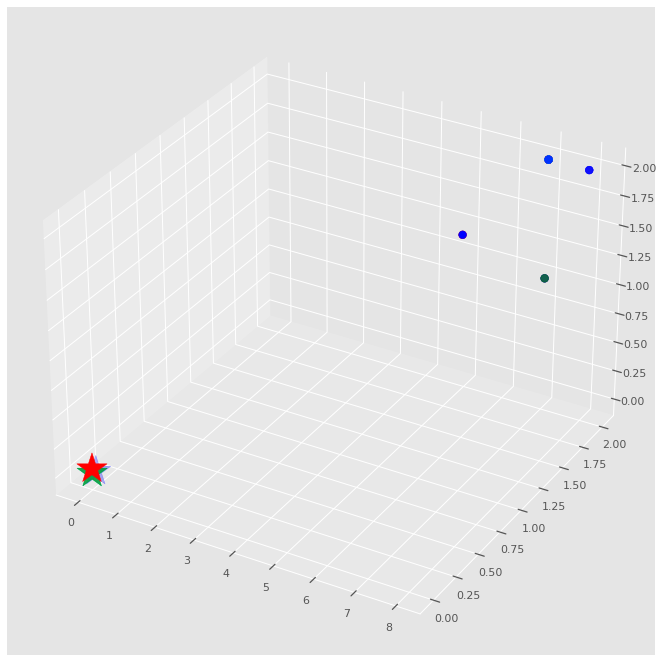

In [106]:
#Predicting the clusters
labels= model2.labels_
##Getting the cluster centers
C = model2.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker='*',c=colores,s=1000)

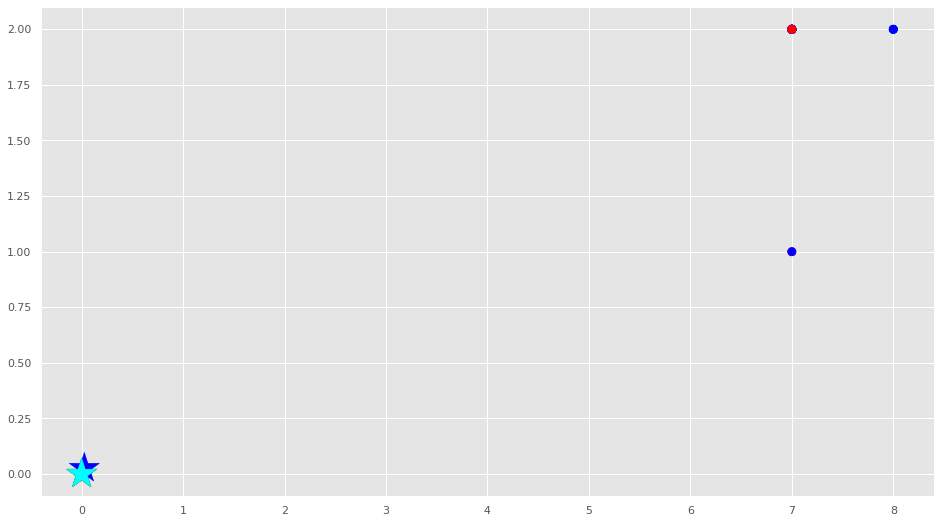

In [107]:
#Getting the values and plottig it
f1 = df['MES'].values
f2 = df['USUARIO'].values

plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(C[:,0],C[:,1],marker='*',c=colores,s=1000)
plt.show()

In [108]:
df['cluster4'] = model2.labels_

In [109]:
df[df['cluster4']== 4]

,Unnamed: 0,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,...,word_count,avg_word,stopwords,hashtags,numerics,key_words,numReg,Localization,cluster3,cluster4


In [100]:
df.groupby(["cluster3",'JORNADA']).cluster3.count()

cluster3  JORNADA
0         1           5
          2          19
1         2           3
2         1           3
3         2           1
4         2           2
Name: cluster3, dtype: int64

In [110]:
df.groupby(["cluster4",'JORNADA']).cluster3.count()

cluster4  JORNADA
0         1           1
          2           9
1         1           3
2         1           4
          2          13
3         2           3
Name: cluster3, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      33 non-null     int64  
 1   level_0         33 non-null     int64  
 2   index           33 non-null     int64  
 3   Usuario         33 non-null     object 
 4   Fecha Creacion  33 non-null     object 
 5   Tweet           33 non-null     object 
 6   Sentimiento     33 non-null     object 
 7   UrlenTweet      1 non-null      object 
 8   UrlTweet        33 non-null     object 
 9   TweetE          33 non-null     object 
 10  compound_Score  33 non-null     float64
 11  Negative_Score  33 non-null     float64
 12  Positive_Score  33 non-null     float64
 13  Neutro_Score    33 non-null     float64
 14  MES             33 non-null     int64  
 15  JORNADA         33 non-null     int64  
 16  USUARIO         33 non-null     int64  
 17  Sent_           33 non-null     int64

In [112]:
df.describe()

,Unnamed: 0,level_0,index,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,...,cluster,word_count,avg_word,stopwords,hashtags,numerics,numReg,Localization,cluster3,cluster4
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000
mean,16.00000,153.666667,153.666667,-0.478461,0.152455,0.025848,0.821697,7.090909,1.757576,1.939394,...,2.000000,16.878788,5.801005,1.545455,0.121212,0.272727,16.00000,1.121212,0.606061,1.393939
std,9.66954,87.888305,87.888305,0.251962,0.087361,0.038879,0.088541,0.291937,0.435194,0.242306,...,0.790569,7.614778,1.044460,2.463368,0.545297,0.801277,9.66954,2.088025,1.170988,1.028937
min,0.00000,19.000000,19.000000,-0.923100,0.049000,0.000000,0.575000,7.000000,1.000000,1.000000,...,0.000000,6.000000,3.409091,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,8.00000,86.000000,86.000000,-0.689200,0.091000,0.000000,0.783000,7.000000,2.000000,2.000000,...,2.000000,11.000000,5.200000,0.000000,0.000000,0.000000,8.00000,0.000000,0.000000,0.000000
50%,16.00000,166.000000,166.000000,-0.458800,0.141000,0.000000,0.829000,7.000000,2.000000,2.000000,...,2.000000,15.000000,5.666667,1.000000,0.000000,0.000000,16.00000,0.000000,0.000000,2.000000
75%,24.00000,226.000000,226.000000,-0.296000,0.190000,0.052000,0.885000,7.000000,2.000000,2.000000,...,2.000000,23.000000,6.280000,3.000000,0.000000,0.000000,24.00000,1.000000,1.000000,2.000000
max,32.00000,277.000000,277.000000,-0.017300,0.425000,0.134000,0.951000,8.000000,2.000000,2.000000,...,4.000000,33.000000,8.500000,13.000000,3.000000,4.000000,32.00000,7.000000,4.000000,3.000000


In [154]:
df_mk_cluster = pd.concat([df.loc[:,['MES','JORNADA','USUARIO','compound_Score','Localization']], pd.DataFrame({'cluster4': labels})], axis = 1) 
df_mk_cluster

,MES,JORNADA,USUARIO,compound_Score,Localization,cluster4
0,8,2,2,-0.2960,0,2
1,8,2,2,-0.9231,1,2
2,8,2,2,-0.8689,0,2
3,7,1,2,-0.9074,0,0
4,7,1,2,-0.4215,0,2
5,7,1,2,-0.7269,0,2
6,7,2,2,-0.5106,0,0
7,7,2,2,-0.7964,2,0
8,7,2,2,-0.4767,3,0
9,7,2,2,-0.7065,0,0


In [153]:
df_mk_cluster = pd.concat([df.loc[:,['MES','JORNADA','USUARIO','compound_Score']], pd.DataFrame({'cluster4': labels})], axis = 1) 
df_mk_cluster

,MES,JORNADA,USUARIO,compound_Score,cluster4
0,8,2,2,-0.2960,2
1,8,2,2,-0.9231,2
2,8,2,2,-0.8689,2
3,7,1,2,-0.9074,0
4,7,1,2,-0.4215,2
5,7,1,2,-0.7269,2
6,7,2,2,-0.5106,0
7,7,2,2,-0.7964,0
8,7,2,2,-0.4767,0
9,7,2,2,-0.7065,0


In [114]:
import seaborn as sns

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


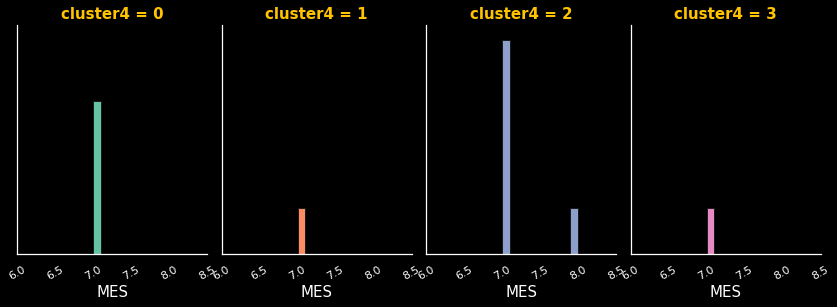

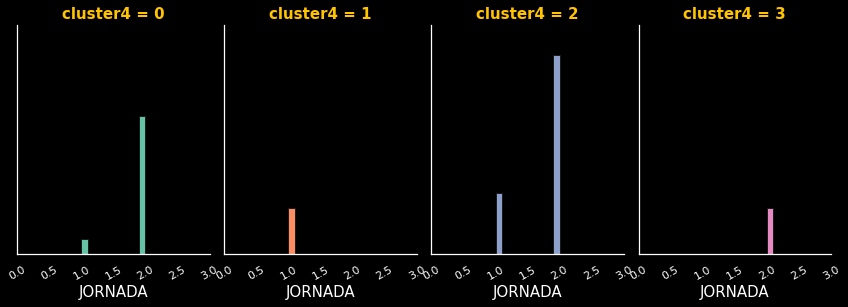

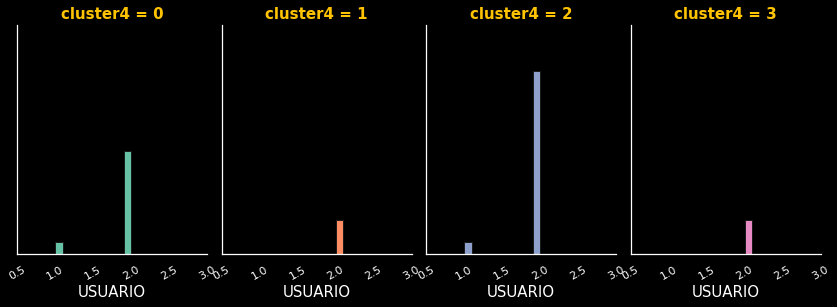

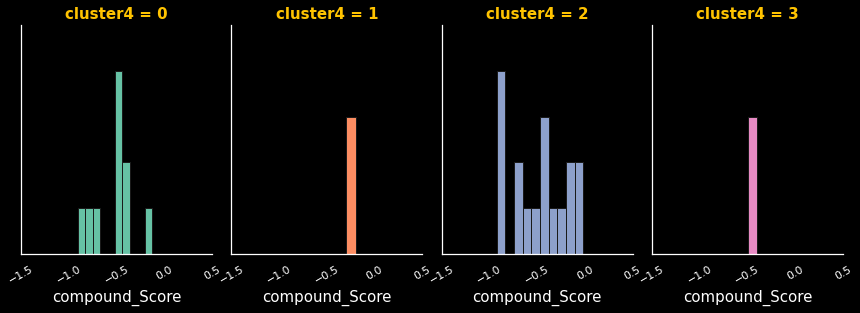

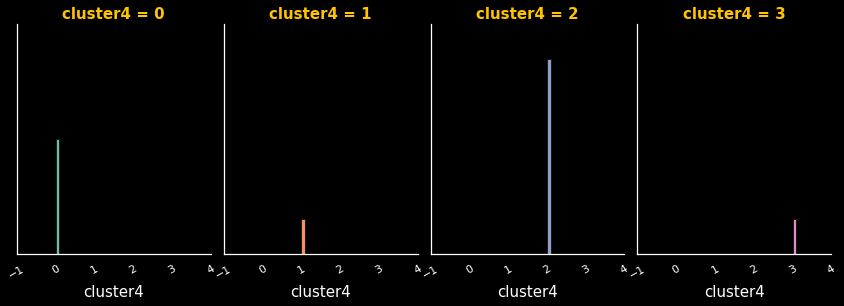

In [115]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster4", hue = "cluster4", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


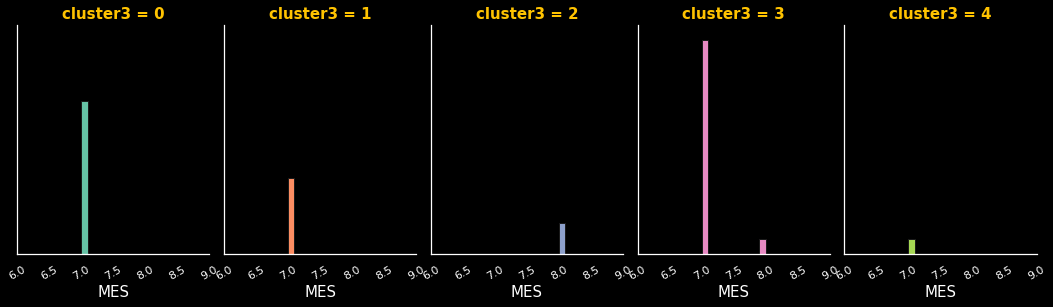

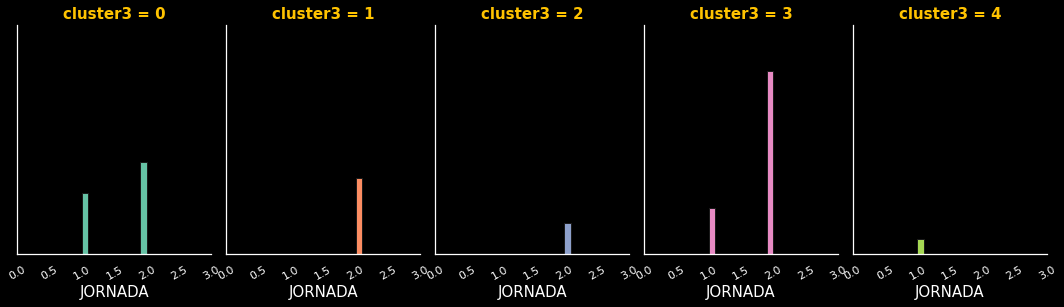

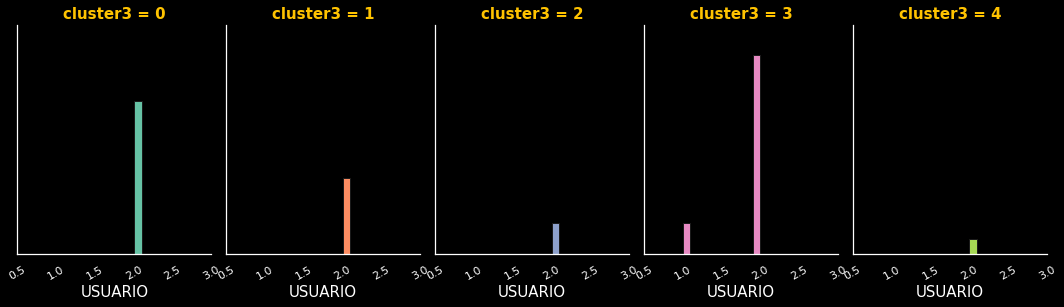

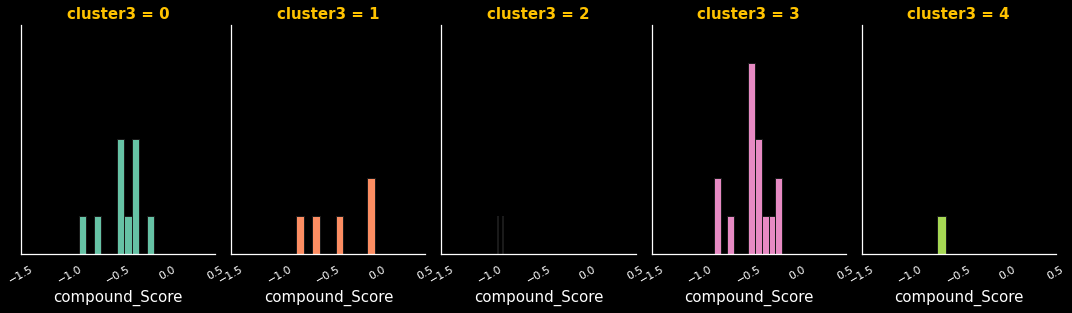

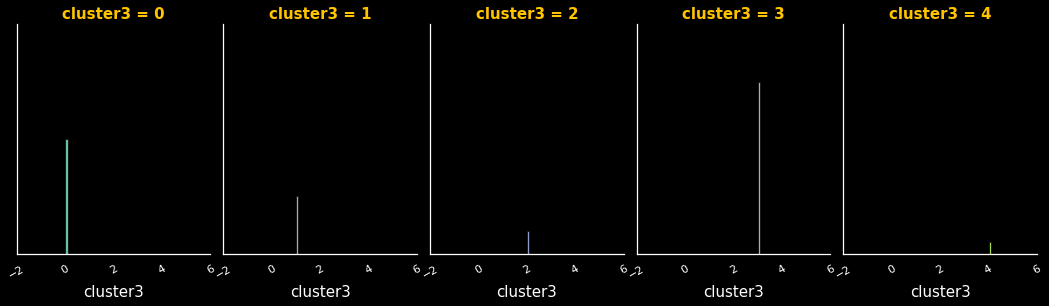

In [65]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster3", hue = "cluster3", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

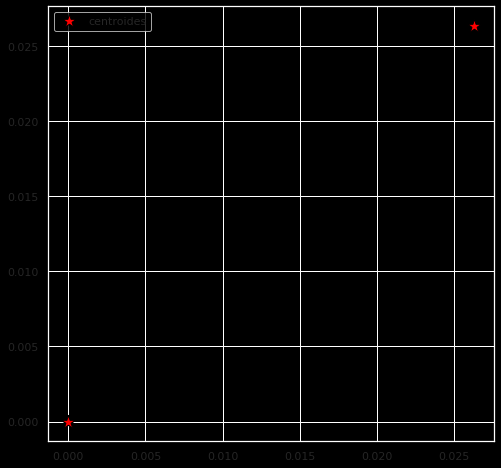

In [116]:
# Gráfico con los puntos y su cluster y los centroides
plt.figure(figsize=(8,8))
plt.scatter(model2.cluster_centers_[:, 0], 
            model2.cluster_centers_[:, 1], s=200, 
            marker='*', c='red', 
            edgecolor='black', label='centroides')
plt.legend(loc="best")
plt.grid()
plt.show()

In [68]:
df[df['cluster3']== 2]

,Unnamed: 0,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,...,word_count,avg_word,stopwords,hashtags,numerics,key_words,numReg,Localization,cluster2,cluster3
1,1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,...,13,7.000000,0,0,0,stealing prisoner prison useless former putting,1,San Andres,0,2
2,2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,...,11,7.636364,0,0,0,ex-prison stealing prison putting useless,2,NaN,0,2


In [69]:
df.describe()

,Unnamed: 0,level_0,index,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,...,Sent_comp,cluster,word_count,avg_word,stopwords,hashtags,numerics,numReg,cluster2,cluster3
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000
mean,16.00000,153.666667,153.666667,-0.478461,0.152455,0.025848,0.821697,7.090909,1.757576,1.939394,...,2.0,2.000000,16.878788,5.801005,1.545455,0.121212,0.272727,16.00000,0.272727,1.757576
std,9.66954,87.888305,87.888305,0.251962,0.087361,0.038879,0.088541,0.291937,0.435194,0.242306,...,0.0,0.790569,7.614778,1.044460,2.463368,0.545297,0.801277,9.66954,0.626135,1.392621
min,0.00000,19.000000,19.000000,-0.923100,0.049000,0.000000,0.575000,7.000000,1.000000,1.000000,...,2.0,0.000000,6.000000,3.409091,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.00000,86.000000,86.000000,-0.689200,0.091000,0.000000,0.783000,7.000000,2.000000,2.000000,...,2.0,2.000000,11.000000,5.200000,0.000000,0.000000,0.000000,8.00000,0.000000,0.000000
50%,16.00000,166.000000,166.000000,-0.458800,0.141000,0.000000,0.829000,7.000000,2.000000,2.000000,...,2.0,2.000000,15.000000,5.666667,1.000000,0.000000,0.000000,16.00000,0.000000,2.000000
75%,24.00000,226.000000,226.000000,-0.296000,0.190000,0.052000,0.885000,7.000000,2.000000,2.000000,...,2.0,2.000000,23.000000,6.280000,3.000000,0.000000,0.000000,24.00000,0.000000,3.000000
max,32.00000,277.000000,277.000000,-0.017300,0.425000,0.134000,0.951000,8.000000,2.000000,2.000000,...,2.0,4.000000,33.000000,8.500000,13.000000,3.000000,4.000000,32.00000,2.000000,4.000000


In [117]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

/var/folders/t7/trqjmgnd7gl42kcp303bgrt40000gn/T/ipykernel_77281/1479837345.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


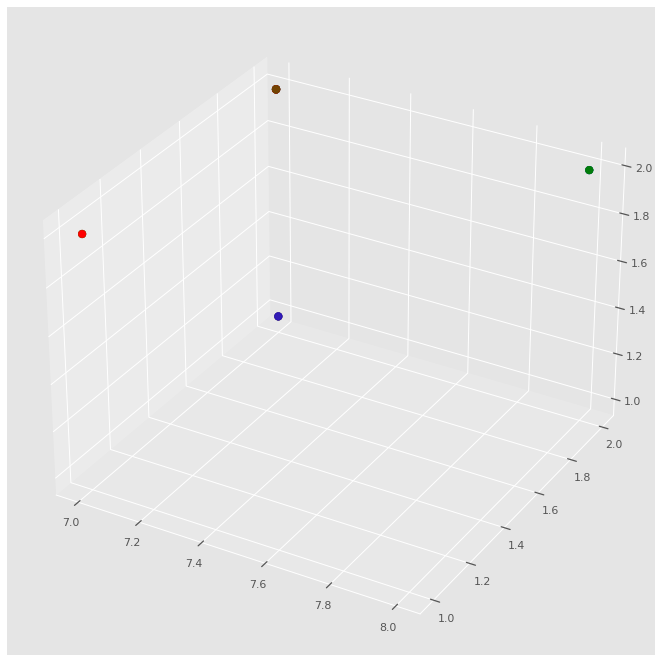

In [118]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

In [122]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [123]:
silhouette_avg = silhouette_score(X, labels)
print("For n_clusters =", k,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : -0.4312197511173656


In [126]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

  

NameError: name 'ax1' is not defined

In [270]:
df.head()

,Unnamed: 0,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,...,TweetE2,text_clean,text_clean2,word_count,avg_word,stopwords,hashtags,numerics,key_words,cluster2
0,0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,...,@DanielSamperO @fdbedout gentleman size that's...,@danielsampero @fdbedout gentleman size that's...,gentleman size that's small go offcorss,6,5.666667,0,0,0,small size,0
1,1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,...,RT @Dantestereo Putting former prisoner prison...,rt @dantestereo putting former prisoner prison...,rt putting former prisoner prison bribing witn...,13,7.000000,0,0,0,stealing prisoner prison useless former,0
2,2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,...,Putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,putting ex-prison prison bribing witnesses use...,11,7.636364,0,0,0,ex-prison stealing prison useless,0
3,3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,...,Perhaps today world country afflicted pandemic...,@offcorss perhaps today world country afflicte...,perhaps today world country afflicted pandemic...,25,6.280000,2,0,0,disappointment deceive afflicted errors,0
4,4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,...,@OFFCORSS I'm tired angry writing I need answe...,@offcorss i'm tired angry writing i need answe...,i'm tired angry writing i need answer capable ...,23,5.956522,3,0,0,violated angry tired,0


In [149]:
clusters

NameError: name 'clusters' is not defined

In [283]:
clusters.head()

,level_0,index,Usuario,Fecha Creacion,Tweet,Sentimiento,UrlenTweet,UrlTweet,TweetE,compound_Score,Negative_Score,Positive_Score,Neutro_Score,MES,JORNADA,USUARIO,Sent_,Sent_comp,cluster
0,19,19,Javier Neira,Aug 5 2020 04:53 PM,@DanielSamperO @fdbedout de esa talla no hay c...,negative,NaN,https://twitter.com/Javier_Neira_/status/12910...,@DanielSamperO @fdbedout there is no gentleman...,-0.2960,0.115,0.000,0.885,8,2,2,2,2,2
1,24,24,Scofield,Aug 3 2020 11:44 PM,RT @Dantestereo: Que metan preso al ex presi p...,negative,NaN,https://twitter.com/Ivanzuluaga95/status/12904...,RT @Dantestereo Putting the former prisoner in...,-0.9231,0.425,0.000,0.575,8,2,2,2,2,2
2,26,26,Al Efe Quatro,Aug 3 2020 10:34 PM,Que metan preso al ex presi por soborno de tes...,neutral,NaN,https://twitter.com/Dantestereo/status/1290415...,Putting the ex-prison in prison for bribing wi...,-0.8689,0.380,0.000,0.620,8,2,2,3,2,2
3,48,48,Nina,Jul 30 2020 12:29 AM,"@OFFCORSS Tal vez, si hoy en el mundo y en el ...",negative,NaN,https://twitter.com/Caromaticas/status/1288632...,@OFFCORSS Perhaps if today in the world and in...,-0.9074,0.197,0.046,0.757,7,1,2,2,2,2
4,49,49,Nina,Jul 30 2020 12:24 AM,"@OFFCORSS Estou cansada de estar enojada, de e...",negative,NaN,https://twitter.com/Caromaticas/status/1288631...,@OFFCORSS I'm tired of being angry of writing ...,-0.4215,0.164,0.134,0.702,7,1,2,2,2,2
8,86,86,😼 agatania 😺,Jul 26 2020 11:17 PM,@OFFCORSS señores no se en manos de quién est...,positive,NaN,https://twitter.com/agatania/status/1287527580...,@OFFCORSS gentlemen I don't know whose hands a...,-0.4767,0.070,0.000,0.930,7,2,2,1,2,1
9,87,87,M.,Jul 26 2020 02:13 PM,RT @Johita0221: @NancyPatricia_G @OFFCORSS 🆘️D...,neutral,NaN,https://twitter.com/Mechis1104/status/12873904...,RT @Johita0221 @NancyPatricia_G @OFFCORSS 🆘 WE...,-0.7065,0.190,0.000,0.810,7,2,2,3,2,0
11,94,94,Gabriel Guerrero,Jul 25 2020 04:53 PM,"@OFFCORSS buen día, hice compra online el 20 d...",positive,NaN,https://twitter.com/wgabrielga/status/12870684...,@OFFCORSS good day I made an online purchase o...,-0.4404,0.087,0.035,0.878,7,2,2,1,2,4
13,106,106,LAURA CATALINA REY F,Jul 24 2020 02:34 AM,RT @reyfigueroa: @LAUREYFIGUEROA Faltó Arturo ...,neutral,NaN,https://twitter.com/LAUREYFIGUEROA/status/1286...,RT @reyfigueroa @LAUREYFIGUEROA Missing Arturo...,-0.2960,0.216,0.000,0.784,7,1,2,3,2,3
14,107,107,@tonsanjr,Jul 24 2020 12:42 AM,RT @reyfigueroa: @LAUREYFIGUEROA Faltó Arturo ...,neutral,NaN,https://twitter.com/Tonsanjr/status/1286461644...,RT @reyfigueroa @LAUREYFIGUEROA Missing Arturo...,-0.2960,0.216,0.000,0.784,7,1,2,3,2,3


In [134]:
# output the result to a text file.

clusters4 = df.groupby('cluster4')    

for cluster in clusters4.groups:
    f = open('clluster4'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters4.get_group(cluster)[['MES','JORNADA']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

In [135]:
print(clusters4)

In [138]:
print("Cluster centroids: \n")
order_centroids = model2.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer2.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :5]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 missing
 prison
 stealing
 putting
 useless
------------
Cluster 1:
 worst
 consumer
 happened
 answer
 email
------------
Cluster 2:
 minutes
 hotline
 stolen
 waiting
 email
------------
Cluster 3:
 terrible
 bought
 bad
 service
 requested
------------


/Users/gisselgutierrez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
colores=['red','green','blue','cyan','yellow']

In [143]:
copyv= data_xlsx2

In [146]:
copyv['Sent_']=data_xlsx2['Sent_'].values
copyv['label']=labels;
cantidadGrupo=pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copyv.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,10.0
1,green,3.0
2,blue,17.0
3,cyan,3.0
4,yellow,NaN
